In [47]:
import os
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [48]:
from darkflow.defaults import argHandler

In [49]:
from darkflow.net.build import TFNet

Create the dictionnary of default parameters to pass to TFNET

In [50]:
FLAGS = argHandler()
FLAGS.setDefaults()

Get the tiny yolo model and pre trained weights

In [82]:
cfgFile = "yolo-voc.cfg"
wFile = "yolo-voc.weights"

In [83]:
if not os.path.exists("/data/"+ cfgFile):
    os.system("wget --directory-prefix=/data https://raw.githubusercontent.com/pjreddie/darknet/master/cfg/" + cfgFile)
if not os.path.exists("/data/" + wFile):
    os.system("wget --directory-prefix=/data https://pjreddie.com/media/files/" + wFile)

Set the parameters

In [84]:
FLAGS["model"] = "/data/" + cfgFile
FLAGS["load"] = "/data/" + wFile
FLAGS["summary"] = "/log"

Initialize the model and load the weights

In [85]:
tfnet = TFNet(FLAGS)

Parsing /data/yolo-voc.cfg
Loading /data/yolo-voc.weights ...
Successfully identified 202704260 bytes
Finished in 0.161612033844s
Model has a VOC model name, loading VOC labels.

Building net ...
Source | Train? | Layer description                | Output size
-------+--------+----------------------------------+---------------
       |        | input                            | (?, 416, 416, 3)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 416, 416, 32)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 208, 208, 32)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 208, 208, 64)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | conv 1x1p0_1  +bnorm  leaky      | (?, 104, 104, 64)
 Load  |  Yep!  | conv 3x3p1_1  +bnorm  leaky      | (?, 104, 104, 128)
 Load  |  Yep!  | maxp 2x2p0_2                     | (?, 52, 52, 128)
 Load  |  Yep!  | conv 3x3p1_1  

Let's get the network

In [86]:
darknet = tfnet.darknet

And check the loaded layers

In [87]:
for layer in darknet.layers:
    print layer.type

convolutional
leaky
maxpool
convolutional
leaky
maxpool
convolutional
leaky
convolutional
leaky
convolutional
leaky
maxpool
convolutional
leaky
convolutional
leaky
convolutional
leaky
maxpool
convolutional
leaky
convolutional
leaky
convolutional
leaky
convolutional
leaky
convolutional
leaky
maxpool
convolutional
leaky
convolutional
leaky
convolutional
leaky
convolutional
leaky
convolutional
leaky
convolutional
leaky
convolutional
leaky
route
convolutional
leaky
reorg
route
convolutional
leaky
convolutional


We can also get the kernel for a layer

In [88]:
layer0 = darknet.layers[0]
print(layer0.w['kernel'])


<tf.Variable '0-convolutional/kernel:0' shape=(3, 3, 3, 32) dtype=float32_ref>


In [89]:
k = layer0.w['kernel']

Let's have a look at the weights for all layer

In [90]:
import tensorflow as tf
session = tfnet.sess

First, write a function to extract the weights, reshape them to create a 2d image and display it. All kernels will be alligned on the x axis, and all channels on the y axis. Hence for 16 kernels, 10 channels, and filter size 3 x 3 we will get an image of 3x10 = 30 lines by 16x3=48 columns

In [91]:
def weightsToImage(tensor):
    kern = session.run(tensor)
    ky, kx, channels, numkernel = kern.shape
    kernReshaped = kern.swapaxes(0,1).swapaxes(0,2).swapaxes(2,3)
    kernFlat = kern.reshape(channels * ky,kx*numkernel)
    #kernFlat = kernFlat.swapaxes(0,1).swapaxes(1,2)
    #print kernFlat.shape
    plt.imshow(kernFlat, interpolation='nearest')
    plt.colorbar()
    plt.show()

Now let's loop over all conv layers and create the plots

Layer idx:0, type: convolutional
kernelsize: x:3, y:3, channels: 3, number of kernels:32


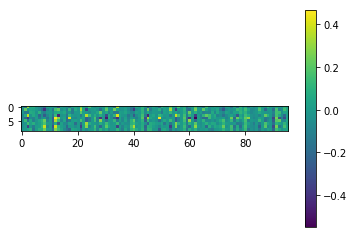

Layer idx:1, type: leaky
Layer idx:2, type: maxpool
Layer idx:3, type: convolutional
kernelsize: x:3, y:3, channels: 32, number of kernels:64


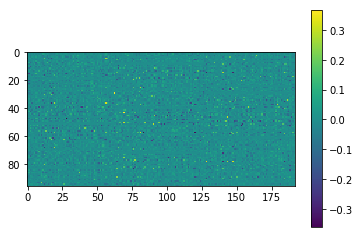

Layer idx:4, type: leaky
Layer idx:5, type: maxpool
Layer idx:6, type: convolutional
kernelsize: x:3, y:3, channels: 64, number of kernels:128


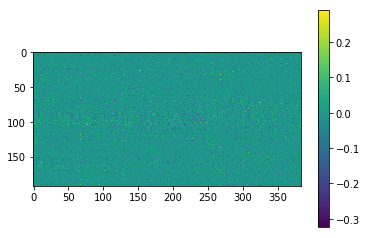

Layer idx:7, type: leaky
Layer idx:8, type: convolutional
kernelsize: x:1, y:1, channels: 128, number of kernels:64


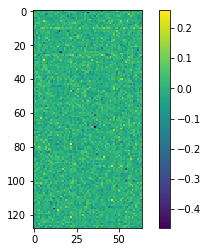

Layer idx:9, type: leaky
Layer idx:10, type: convolutional
kernelsize: x:3, y:3, channels: 64, number of kernels:128


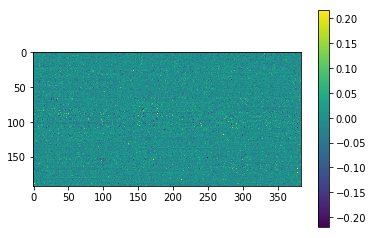

Layer idx:11, type: leaky
Layer idx:12, type: maxpool
Layer idx:13, type: convolutional
kernelsize: x:3, y:3, channels: 128, number of kernels:256


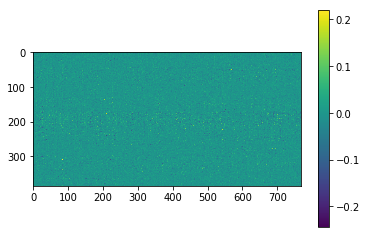

Layer idx:14, type: leaky
Layer idx:15, type: convolutional
kernelsize: x:1, y:1, channels: 256, number of kernels:128


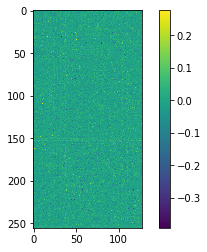

Layer idx:16, type: leaky
Layer idx:17, type: convolutional
kernelsize: x:3, y:3, channels: 128, number of kernels:256


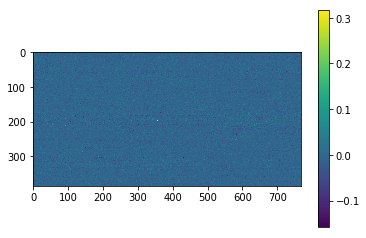

Layer idx:18, type: leaky
Layer idx:19, type: maxpool
Layer idx:20, type: convolutional
kernelsize: x:3, y:3, channels: 256, number of kernels:512


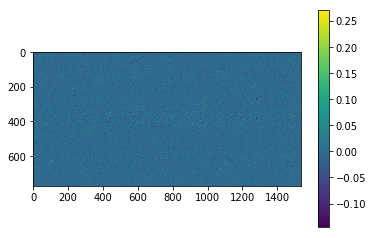

Layer idx:21, type: leaky
Layer idx:22, type: convolutional
kernelsize: x:1, y:1, channels: 512, number of kernels:256


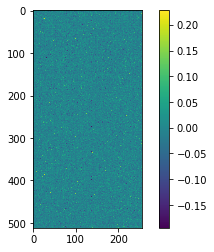

Layer idx:23, type: leaky
Layer idx:24, type: convolutional
kernelsize: x:3, y:3, channels: 256, number of kernels:512


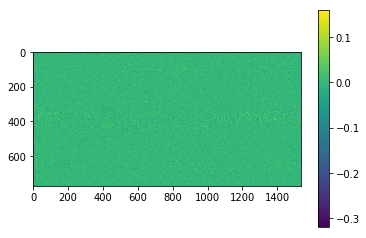

Layer idx:25, type: leaky
Layer idx:26, type: convolutional
kernelsize: x:1, y:1, channels: 512, number of kernels:256


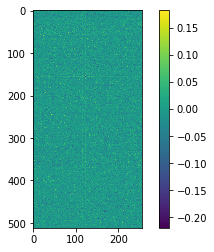

Layer idx:27, type: leaky
Layer idx:28, type: convolutional
kernelsize: x:3, y:3, channels: 256, number of kernels:512


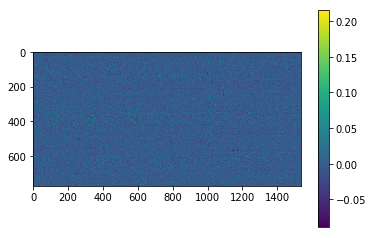

Layer idx:29, type: leaky
Layer idx:30, type: maxpool
Layer idx:31, type: convolutional
kernelsize: x:3, y:3, channels: 512, number of kernels:1024


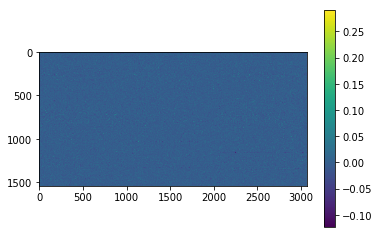

Layer idx:32, type: leaky
Layer idx:33, type: convolutional
kernelsize: x:1, y:1, channels: 1024, number of kernels:512


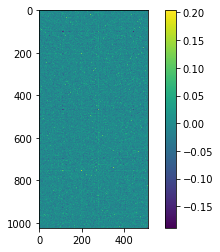

Layer idx:34, type: leaky
Layer idx:35, type: convolutional
kernelsize: x:3, y:3, channels: 512, number of kernels:1024


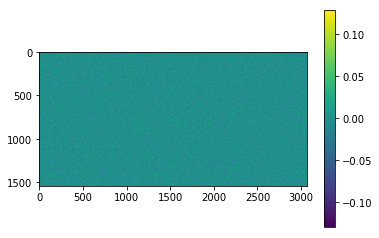

Layer idx:36, type: leaky
Layer idx:37, type: convolutional
kernelsize: x:1, y:1, channels: 1024, number of kernels:512


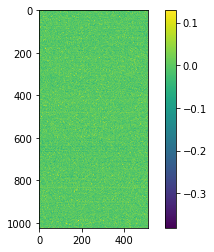

Layer idx:38, type: leaky
Layer idx:39, type: convolutional
kernelsize: x:3, y:3, channels: 512, number of kernels:1024


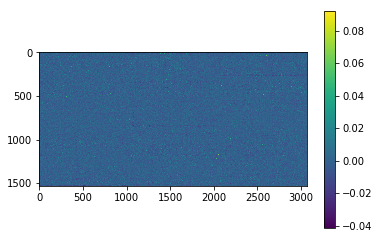

Layer idx:40, type: leaky
Layer idx:41, type: convolutional
kernelsize: x:3, y:3, channels: 1024, number of kernels:1024


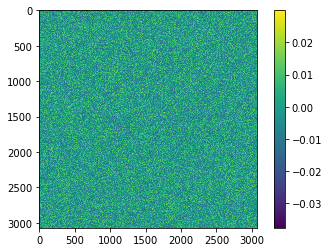

Layer idx:42, type: leaky
Layer idx:43, type: convolutional
kernelsize: x:3, y:3, channels: 1024, number of kernels:1024


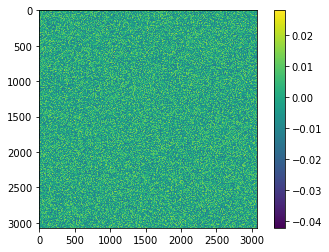

Layer idx:44, type: leaky
Layer idx:45, type: route
Layer idx:46, type: convolutional
kernelsize: x:1, y:1, channels: 512, number of kernels:64


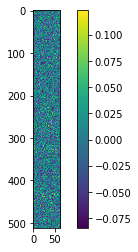

Layer idx:47, type: leaky
Layer idx:48, type: reorg
Layer idx:49, type: route
Layer idx:50, type: convolutional
kernelsize: x:3, y:3, channels: 1280, number of kernels:1024


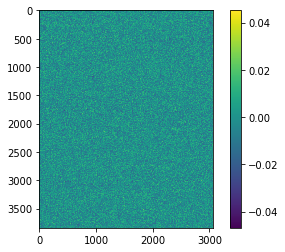

Layer idx:51, type: leaky
Layer idx:52, type: convolutional
kernelsize: x:1, y:1, channels: 1024, number of kernels:125


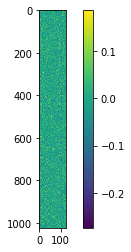

In [92]:
for layeridx, layer in enumerate(darknet.layers):
    
    print "Layer idx:%d, type: %s" % (layeridx, layer.type)
    if layer.type == "convolutional":
        tensor = layer.w['kernel']
        ky, kx, chan, kernels = tensor.shape
        print "kernelsize: x:%d, y:%d, channels: %d, number of kernels:%d" % (kx, ky, chan, kernels)
        weightsToImage(tensor)

Now let's get an image and do a prediction

In [93]:
if not os.path.exists("person.jpg"):
    os.system("wget https://raw.githubusercontent.com/pjreddie/darknet/master/data/person.jpg")

Load it with opencv

In [94]:
im = cv2.imread("person.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB);

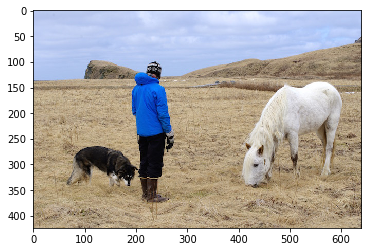

In [95]:
plt.imshow(im)
plt.show()

Convert it to numpy array

In [112]:
a = np.asarray(im)

Do the prediction. Get the results

In [113]:
pred = tfnet.return_predict(a)

the prediction is a dictionnary of objects defined as bounding boxes, classes and confidence

In [114]:
pred

[{'bottomright': {'x': 264, 'y': 397},
  'confidence': 0.0,
  'label': 'aeroplane',
  'topleft': {'x': 186, 'y': 77}},
 {'bottomright': {'x': 259, 'y': 382},
  'confidence': 0.77311647,
  'label': 'person',
  'topleft': {'x': 172, 'y': 90}}]

Let's loop over the prediction for which we are confident enough, and draw the bbox over the image

(424, 640, 3)


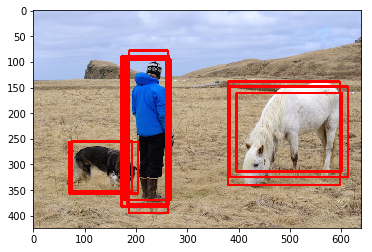

In [115]:
print im.shape
for p in pred:
    pt1 = (p["bottomright"]["x"],p["bottomright"]["y"])
    pt2 = (p["topleft"]["x"],p["topleft"]["y"])
    if (p["confidence"] > 0.1):
        cv2.rectangle(im, pt1, pt2, (255,0,0), 3)
plt.imshow(im)
plt.show()